# STIB-MIVB Network Map

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import folium as fl
import matplotlib.pyplot as plt

In [2]:
# load lines stops from shapefile

stib_lines = gpd.read_file("stib_data/network/ACTU_LINES.shp")
stib_stops = gpd.read_file("stib_data/network/ACTU_STOPS.shp")

In [3]:
# attributes for each stop

stib_stops.head()

Code_Ligne  Variante  succession stop_id          descr_fr  \
0       012b         1           1   9600B  BRUSSELS AIRPORT   
1       012b         1           2    3017           BOURGET   
2       012b         1           3    5048          DA VINCI   
3       012b         1           4    2695            GENEVE   
4       012b         1           5    2250            MEISER   

           descr_nl          alpha_fr          alpha_nl   coord_x   coord_y  \
0  BRUSSELS AIRPORT  Brussels Airport  Brussels Airport  157950.0  176429.0   
1           BOURGET           Bourget           Bourget  154334.0  174200.0   
2          DA VINCI          Da Vinci          Da Vinci  152934.0  173976.0   
3            GENEVE            Genève            Genève  152428.0  172606.0   
4            MEISER            Meiser            Meiser  152045.0  171508.0   

  mode  numero_lig       terminus                       geometry  
0    B          12  BRUSSELS CITY  POINT (157950.000 176429.000)  
1    B          12  BRUSSELS CITY  POINT (154334.000 174200.000)  
2    B          12  BRUSSELS CITY  POINT (152934.000 173976.000)  
3    B          12  BRUSSELS CITY  POINT (152428.000 172606.000)  
4    B          12  BRUSSELS CITY  POINT (152045.000 171508.000)

In [4]:
# store google maps tile layer

basemaps = {
    'Google Maps': fl.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Maps',
        overlay = True,
        control = True
    )}

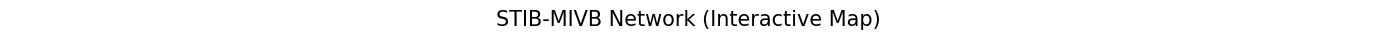

In [5]:
# plot interactive map for stib network
# include google maps layer

m = stib_lines.explore(name = "lines", color = 'midnightblue')
m2 = stib_stops.explore(m = m, name = "points", color = 'orange', marker_type = 'circle', marker_kwds = {'radius': 25, 'fill': True})
basemaps['Google Maps'].add_to(m2)
fl.LayerControl().add_to(m2)

fig, ax = plt.subplots(1, 1, figsize = (17.5, 0.01))
ax.set_title('STIB-MIVB Network (Interactive Map)', size = 15)
ax.axis("off")

plt.show()
m2

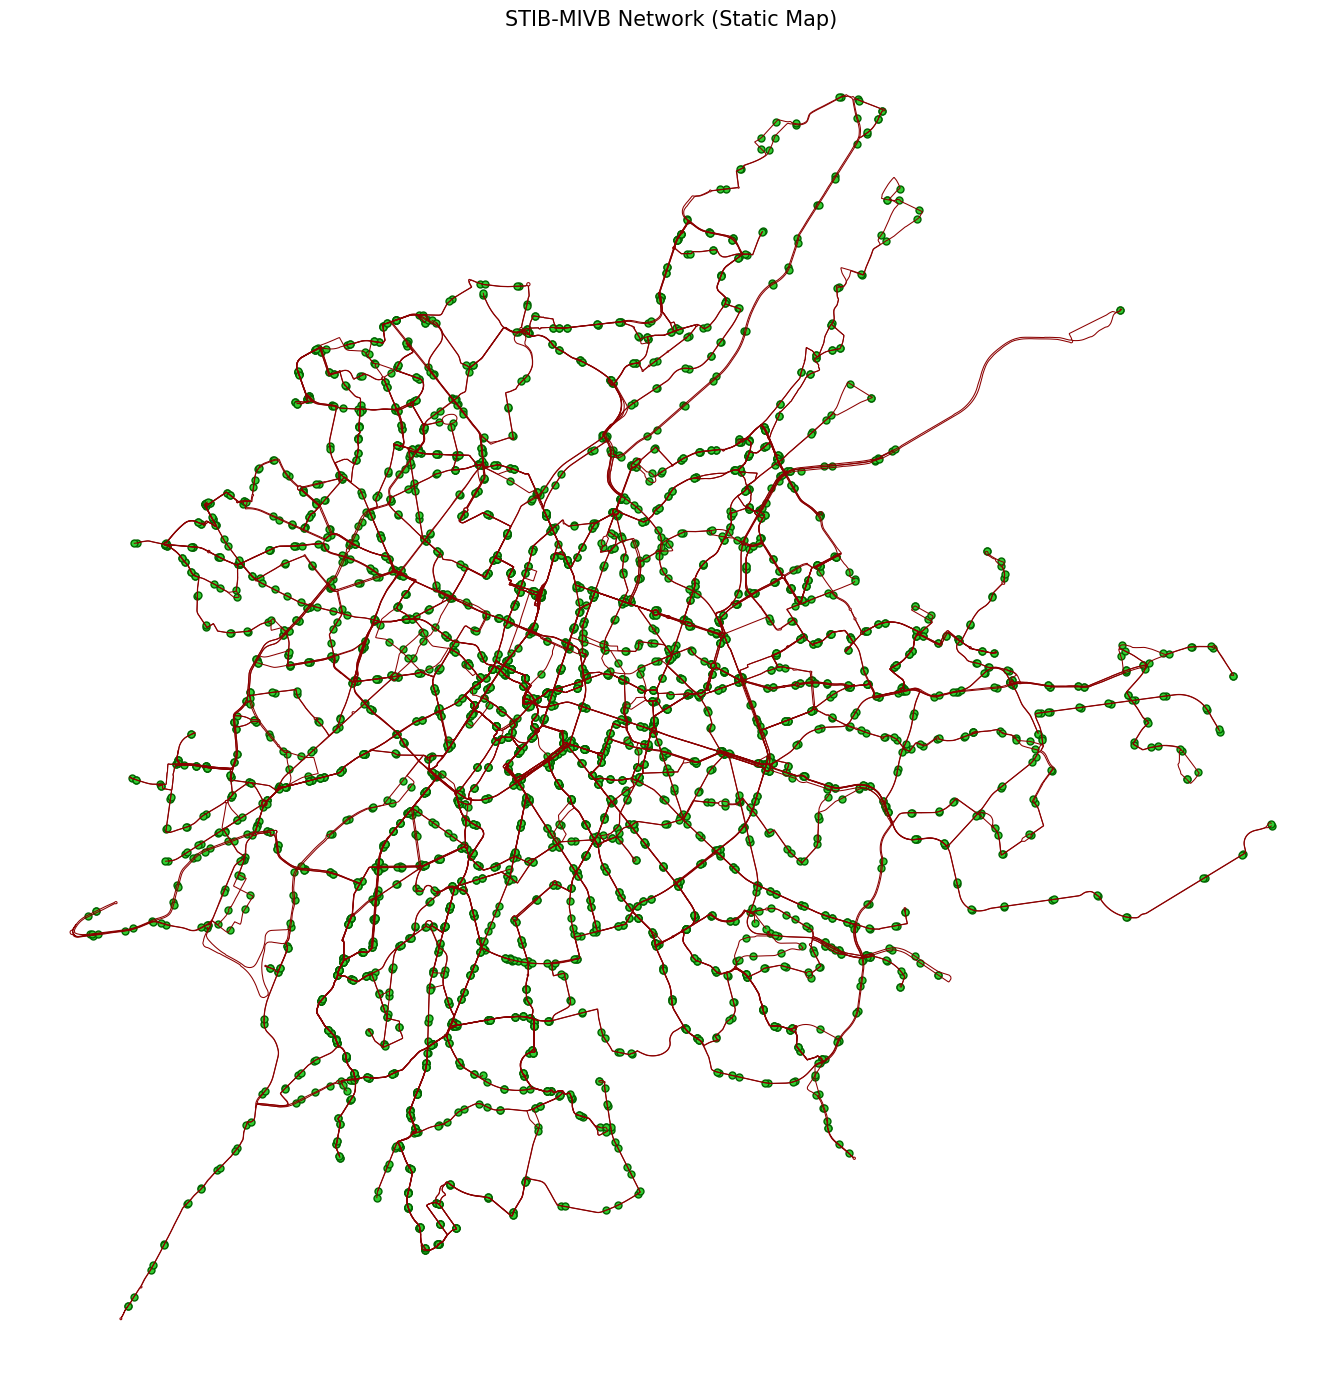

In [6]:
# plot static map for stib network

fig, ax = plt.subplots(1, 1, figsize = (17.5, 17.5))

stib_stops.plot(ax = ax, color = 'limegreen', edgecolors = 'darkgreen', markersize = 25)
stib_lines.plot(ax = ax, color = 'darkred', linewidth = 0.75)
ax.set_title('STIB-MIVB Network (Static Map)', size = 15)
ax.axis("off")

plt.show()

## End.